In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_all = pd.read_excel('ccrb_datatransparencyinitiative_20170207.xlsx',sheet_name = 'Complaints_Allegations')

In [3]:
columns = df_all.columns
renames = {}
for col in columns:
    newCol = col.replace('&','')
    renames[col] = newCol.replace(' ', '_')
df_all = df_all.rename(columns=renames)

In [4]:
df_all.describe()

,UniqueComplaintId,Close_Year,Received_Year,Incident_Year
count,206718.000000,206718.000000,206718.000000,206718.000000
mean,35213.534061,2010.471294,2009.885878,2009.854526
std,20297.666987,3.162415,3.252095,3.250565
min,1.000000,2006.000000,1999.000000,1999.000000
25%,17578.000000,2008.000000,2007.000000,2007.000000
50%,35261.500000,2010.000000,2009.000000,2009.000000
75%,52825.750000,2013.000000,2013.000000,2012.000000
max,70245.000000,2017.000000,2017.000000,2017.000000


In [5]:
df = df_all.dropna(how = 'any', inplace = False)
df.describe()

,UniqueComplaintId,Close_Year,Received_Year,Incident_Year
count,202390.000000,202390.000000,202390.000000,202390.000000
mean,35200.958560,2010.482351,2009.894881,2009.863521
std,20302.568241,3.163376,3.253213,3.251659
min,1.000000,2006.000000,1999.000000,1999.000000
25%,17539.000000,2008.000000,2007.000000,2007.000000
50%,35242.000000,2010.000000,2009.000000,2009.000000
75%,52834.750000,2013.000000,2013.000000,2013.000000
max,70245.000000,2017.000000,2017.000000,2017.000000


The "Complaints_Allegations" sheet of this excel file contains data on all CCRB jurisdiction complaints closed in or after 2006.
Some data in the Data Transparency Initiative reports on complaints received.

Excel Column Descriptions:

Column A: DateStamp - the date the file was created.
Column B: UniqueComplaintId - a randomly assigned number used to uniquely identify distinct complaints. A single UniqueComplaintId may have multiple associated allegations.
Column C: Close Year - the year the complaint was closed by the CCRB.
Column D: CCRB Received Year - the year the complaint was received by the CCRB.
Column E: Borough of Occurrence - the borough in which the incident occurred.
Column F: Is Full Investigation - a logical marker indicating whether the complaint was fully investigated by the CCRB.
Column G: Complaint Has Video Evidence - a logical marker indicating whether the CCRB has collected any video associated with the complaint.
Column H: Complaint Filed Mode - how the complaint was filed.
Column I: Complaint Filed Place - where the complaint was filed.
Column J: Complaint Contains Stop & Frisk Allegations - a logical marker indicating whether the complaint contains an allegation of stop, question, search of person or frisk.
Column K: Incident Location - a general description of the incident location.
Column L: Incident Year - the year of the incident which led to the complaint.
Column M: Encounter Outcome - the outcome of the encounter.
Column N: Reason For Initial Contact - the reason for initial contact.
Column O: Allegation FADO Type - the FADO type of the allegation (Force; Abuse of Authority; Discourtesy; Offensive Language).
Column P: Allegation Description - the description of the allegation.

If you have questions or comments please visit out Data Transparency Initiative Feedback Page at: http://www1.nyc.gov/site/ccrb/policy/data-transparency-initiative-feedback.page

How many unique complaints (identified by 'UniqueComplaintId') with complete information (i.e. there are no missing values) appear in the dataset?

In [26]:
df.UniqueComplaintId.nunique()

68467

In [91]:
se_b = df.groupby(['Borough_of_Occurrence','UniqueComplaintId']).size().reset_index(name = 'count')
se_b

,Borough_of_Occurrence,UniqueComplaintId,count
0,Bronx,1,5
1,Bronx,2,2
2,Bronx,7,5
3,Bronx,8,8
4,Bronx,11,1
5,Bronx,14,2
6,Bronx,20,5
7,Bronx,27,1
8,Bronx,30,2
9,Bronx,34,5


In [92]:
df.groupby(['Borough_of_Occurrence']).size()

Borough_of_Occurrence
Bronx            49135
Brooklyn         71580
Manhattan        41804
Outside NYC        175
Queens           30637
Staten Island     9059
dtype: int64

In [93]:
se_b.groupby(['Borough_of_Occurrence']).size()

Borough_of_Occurrence
Bronx            15603
Brooklyn         23369
Manhattan        16067
Outside NYC         57
Queens           10608
Staten Island     2763
dtype: int64

In [94]:
se_b_uniqueID = se_b.groupby(['Borough_of_Occurrence']).nunique()
se_b_uniqueID

,Borough_of_Occurrence,UniqueComplaintId,count
Borough_of_Occurrence,,,
Bronx,1,15603,27
Brooklyn,1,23369,25
Manhattan,1,16067,21
Outside NYC,1,57,10
Queens,1,10608,24
Staten Island,1,2763,21


In [95]:
round(se_b_uniqueID.UniqueComplaintId.max() / se_b_uniqueID.UniqueComplaintId.sum(),10)

0.3413177151

In [107]:
se_b2016 = df[df.Incident_Year == 2016].groupby(['Borough_of_Occurrence','UniqueComplaintId']).size().reset_index(name = 'count')
se_b2016_uniqueID = se_b2016.groupby(['Borough_of_Occurrence']).nunique()

In [108]:
#year  Manhattan	Brooklyn	Queens	  Bronx	      Staten Is. total
#2016	1,643,734	2,629,150	2,333,054	1,455,720	476,015	8,537,673
se_b2016_uniqueID['Population'] = [1455720, 2629150, 1643734, None, 2333054, 476015]
se_b2016_uniqueID['ComplaintsPerCapital'] = se_b2016_uniqueID.UniqueComplaintId/se_b2016_uniqueID.Population
print('complaints per 100k residents in the borough with the highest number of complaints per capita in 2016\n', \
      round(se_b2016_uniqueID.ComplaintsPerCapital.max()*10**5,10))
se_b2016_uniqueID

complaints per 100k residents in the borough with the highest number of complaints per capita in 2016
 53.0321765175


,Borough_of_Occurrence,UniqueComplaintId,count,Population,ComplaintsPerCapital
Borough_of_Occurrence,,,,,
Bronx,1,772,23,1455720.0,0.000530
Brooklyn,1,1068,18,2629150.0,0.000406
Manhattan,1,844,18,1643734.0,0.000513
Outside NYC,1,3,3,NaN,NaN
Queens,1,589,15,2333054.0,0.000252
Staten Island,1,149,10,476015.0,0.000313


In [120]:
se_duration = df.groupby(['Borough_of_Occurrence','UniqueComplaintId'])['Incident_Year','Close_Year'].first().reset_index()
se_duration['Duration'] = se_duration.Close_Year - se_duration.Incident_Year
round(se_duration.Duration.mean(),10)

0.5044912147

In [174]:
se_stop = df.groupby(['Incident_Year','UniqueComplaintId'])['Complaint_Contains_Stop__Frisk_Allegations'].first().reset_index()
se_stop_year = se_stop[se_stop.Complaint_Contains_Stop__Frisk_Allegations == True].groupby(['Incident_Year']).size().reset_index(name = 'Count')
se_stop_year


,Incident_Year,Count
0,1999,1
1,2002,1
2,2003,3
3,2004,67
4,2005,1110
5,2006,2369
6,2007,2513
7,2008,2192
8,2009,2187
9,2010,1805


In [434]:
x = np.array(se_stop_year[(se_stop_year.Incident_Year > 2005) & (se_stop_year.Incident_Year != 2017)].Incident_Year).reshape(-1, 1)
y = np.array(se_stop_year[(se_stop_year.Incident_Year > 2005) & (se_stop_year.Incident_Year != 2017)].Count)
r_fit = linear_model.LinearRegression().fit(x,y)
r_fit.coef_

array([-189.68181818])

In [435]:
r_fit.intercept_

383080.4090909092

In [427]:
r_fit.predict(np.array([2018]).reshape(-1,1))

array([302.5])

In [192]:
r_predic = r_fit.predict(x)

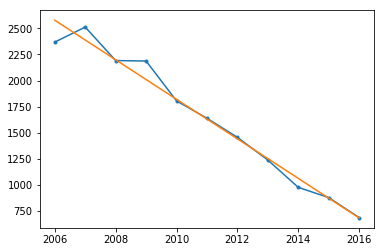

In [193]:
plt.plot(x,y,'.-',x, r_predic)

In [425]:
se_video = df.groupby(['UniqueComplaintId'])['Complaint_Has_Video_Evidence','Is_Full_Investigation'].first().reset_index()

se_video.head()

,UniqueComplaintId,Complaint_Has_Video_Evidence,Is_Full_Investigation
0,1,False,False
1,2,False,False
2,3,False,False
3,4,False,True
4,5,False,False


# Chi Square Test

In [214]:
video_data = {'Has_Video':[se_video[(se_video.Complaint_Has_Video_Evidence == True) & (se_video.Is_Full_Investigation == True)].UniqueComplaintId.count(),\
                          se_video[(se_video.Complaint_Has_Video_Evidence == True) & (se_video.Is_Full_Investigation == False)].UniqueComplaintId.count()],
             'No_Video': [se_video[(se_video.Complaint_Has_Video_Evidence == False) & (se_video.Is_Full_Investigation == True)].UniqueComplaintId.count(),\
                         se_video[(se_video.Complaint_Has_Video_Evidence == False) & (se_video.Is_Full_Investigation == False)].UniqueComplaintId.count()],
             }
df_video = pd.DataFrame(data = video_data,index = ['Full_Investigate','Not_Full_Investigate'] )
df_video

,Has_Video,No_Video
Full_Investigate,1465,21889
Not_Full_Investigate,584,44529


In [247]:
#df_video.loc['Sum_by_Video'] = [df_video.Has_Video.iloc[0:2].sum(), df_video.No_Video.iloc[0:2].sum()]
df_video['Sum_by_Investigate'] = [df_video.iloc[0,0:2].sum(), df_video.iloc[1,0:2].sum(), df_video.iloc[2,0:2].sum()]
df_video

,Has_Video,No_Video,Sum_by_Investigate
Full_Investigate,1465,21889,23354.0
Not_Full_Investigate,584,44529,45113.0
Sum_by_Video,2049,66418,68467.0


In [318]:
f_obs = np.array(df_video.iloc[0:2,0:2])
ratio = n.array([[df_video.Sum_by_Investigate.loc['Full_Investigate']], [df_video.Sum_by_Investigate.loc['Not_Full_Investigate'] ]])\
/ df_video.Sum_by_Investigate.loc['Sum_by_Video']
f_sum = np.array(df_video.iloc[2,0:2])
f_exp = ratio *f_sum

In [309]:
ratio 

array([[0.34109863],
       [0.65890137]])

In [319]:
f_sum

array([ 2049., 66418.])

In [320]:
f_obs

array([[ 1465, 21889],
       [  584, 44529]])

In [321]:
f_exp = ratio *f_sum
f_exp

array([[  698.91109586, 22655.08890414],
       [ 1350.08890414, 43762.91109586]])

In [332]:
stats.chisquare(f_obs, f_exp, ddof=1, axis=None)

Power_divergenceResult(statistic=1313.7462956601673, pvalue=5.291960415780173e-286)

In [333]:
round(1313.7462956601673,10)

1313.7462956602

In [348]:
df.head()

,DateStamp,UniqueComplaintId,Close_Year,Received_Year,Borough_of_Occurrence,Is_Full_Investigation,Complaint_Has_Video_Evidence,Complaint_Filed_Mode,Complaint_Filed_Place,Complaint_Contains_Stop__Frisk_Allegations,Incident_Location,Incident_Year,Encounter_Outcome,Reason_For_Initial_Contact,Allegation_FADO_Type,Allegation_Description
0,2017-02-07,6,2006,2006,Brooklyn,False,False,Phone,IAB,False,Street/highway,2006,No Arrest or Summons,PD suspected C/V of violation/crime - street,Discourtesy,Action
1,2017-02-07,11,2006,2006,Bronx,False,False,Phone,IAB,False,Street/highway,2006,Arrest,Other,Force,Physical force
2,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Strip-searched
3,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Seizure of property
4,2017-02-07,20,2006,2005,Bronx,False,False,Call Processing System,CCRB,True,Street/highway,2005,No Arrest or Summons,Other,Abuse of Authority,Search (of person)


In [395]:
#Column O: Allegation FADO Type - the FADO type of the allegation \
#(Force; Abuse of Authority; Discourtesy; Offensive Language).
df_FADO= df.loc[:,['UniqueComplaintId','Allegation_FADO_Type', 'Allegation_Description']]

dummy = pd.get_dummies(df_FADO['Allegation_FADO_Type'])
df_indicator = pd.concat([df_FADO, dummy], axis = 1)

names = {}
for c in df_indicator.columns:
    names[c] = c.replace(' ', '_')
df_indicator = df_indicator.rename(columns = names)

df_indicator.head()

,UniqueComplaintId,Allegation_FADO_Type,Allegation_Description,Abuse_of_Authority,Discourtesy,Force,Offensive_Language
0,6,Discourtesy,Action,0,1,0,0
1,11,Force,Physical force,0,0,1,0
2,20,Abuse of Authority,Strip-searched,1,0,0,0
3,20,Abuse of Authority,Seizure of property,1,0,0,0
4,20,Abuse of Authority,Search (of person),1,0,0,0


In [397]:
df_ind_1 = df_indicator.groupby('UniqueComplaintId').sum().reset_index()
df_ind_2 = df_indicator.groupby('UniqueComplaintId')['Allegation_FADO_Type'].count().reset_index(name = 'Count')
df_ind_1.head()

,UniqueComplaintId,Abuse_of_Authority,Discourtesy,Force,Offensive_Language
0,1,2,1,2,0
1,2,2,0,0,0
2,3,0,1,0,0
3,4,2,1,0,0
4,5,0,0,1,0


In [401]:
df_ind_1.loc[df_ind_1.Abuse_of_Authority > 1, 'Abuse_of_Authority'] = 1
df_ind_1.loc[df_ind_1.Discourtesy > 1, 'Discourtesy'] = 1
df_ind_1.loc[df_ind_1.Force > 1, 'Force'] = 1
df_ind_1.loc[df_ind_1.Offensive_Language > 1, 'Offensive_Language'] = 1

In [387]:
df_ind_2.head()

,UniqueComplaintId,Count
0,1,5
1,2,2
2,3,1
3,4,3
4,5,1


In [440]:
df_i = df_ind_1.merge(df_ind_2, on = 'UniqueComplaintId')
df_i.shape

(68467, 6)

In [441]:
Xi = df_i.iloc[:,1:5]
yi = df_i.iloc[:,5]

ri= linear_model.LinearRegression().fit(Xi,yi)
ri.coef_

array([2.56970091, 1.60701327, 1.90415894, 1.47685452])

In [46]:
se_bu = df_all.groupby(['Borough_of_Occurrence','UniqueComplaintId']).size().reset_index(name = 'Count')
se_b = se_bu.groupby('Borough_of_Occurrence').size().reset_index(name = 'ComplaintCount')
se_b.drop(index = 3, inplace = True)
se_b

,Borough_of_Occurrence,ComplaintCount
0,Bronx,15911
1,Brooklyn,23899
2,Manhattan,16399
4,Queens,10816
5,Staten Island,2819


In [48]:

se_b['Number_Of_Precinct'] = [12,23,22,16,4]
#se_b['Population'] = [1455720, 2629150, 1643734,2333054, 476015]
#se_b['Complaints_Per_Capita'] = se_b.ComplaintCount/se_b.Population
se_b['Number_Of_Officers_Per_Borough'] = se_b.ComplaintCount/se_b.ComplaintCount.sum()*36000
se_b['Number_Of_Officers_Per_Precinct'] = se_b.Number_Of_Officers_Per_Borough/se_b.Number_Of_Precinct
se_b

,Borough_of_Occurrence,ComplaintCount,Number_Of_Precinct,Number_Of_Officers_Per_Borough,Number_Of_Officers_Per_Precinct
0,Bronx,15911,12,8201.076685,683.423057
1,Brooklyn,23899,23,12318.366646,535.581159
2,Manhattan,16399,22,8452.608671,384.209485
4,Queens,10816,16,5574.938434,348.433652
5,Staten Island,2819,4,1453.009564,363.252391


In [50]:
r = se_b.Number_Of_Officers_Per_Precinct.max()/se_b.Number_Of_Officers_Per_Precinct.min()
round(r, 10)

1.9614151874